In [ ]:
import pandas as pd
feature = pd.read_csv('/content/featureall.csv')
dftrain = pd.read_csv('/content/dftrain.csv')
dftest = pd.read_csv('/content/dftest.csv')
#feature = featureall
feature

,Unnamed: 0,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,Class
0,0,15.79,10.53,0.00,5.26,15.79,10.53,5.26,0.00,0.00,5.26,0.00,5.26,5.26,10.53,5.26,0.00,5.26,0.00,0.00,0.00,Antiangio
1,1,5.88,0.00,5.88,2.94,2.94,2.94,2.94,8.82,17.65,17.65,2.94,5.88,0.00,2.94,5.88,5.88,0.00,5.88,2.94,0.00,Antiangio
2,2,35.00,0.00,5.00,5.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,10.00,5.00,10.00,0.00,5.00,5.00,0.00,0.00,Antiangio
3,3,15.79,10.53,0.00,0.00,0.00,15.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.26,15.79,21.05,5.26,5.26,5.26,0.00,Antiangio
4,4,15.79,10.53,0.00,5.26,10.53,10.53,5.26,5.26,0.00,0.00,0.00,5.26,5.26,0.00,5.26,5.26,10.53,0.00,0.00,5.26,Antiangio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,195,6.67,0.00,0.00,13.33,0.00,6.67,0.00,0.00,6.67,6.67,0.00,0.00,6.67,0.00,26.67,6.67,0.00,13.33,0.00,6.67,Negative
464,196,0.00,0.00,20.00,13.33,0.00,6.67,0.00,6.67,6.67,20.00,0.00,0.00,0.00,0.00,6.67,6.67,0.00,6.67,0.00,6.67,Negative
465,197,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67,0.00,20.00,6.67,6.67,0.00,6.67,0.00,20.00,6.67,13.33,0.00,6.67,Negative
466,198,0.00,0.00,0.00,20.00,6.67,20.00,0.00,0.00,0.00,6.67,6.67,0.00,6.67,6.67,6.67,0.00,0.00,6.67,0.00,13.33,Negative


In [ ]:
# Assigns the features to X and class label to Y
X = feature.drop('Class', axis=1)
y = feature['Class'].copy()
Xtrain = dftrain.drop('Class', axis=1)
ytrain = dftrain['Class'].copy()
Xtest = dftest.drop('Class', axis=1)
ytest = dftest['Class'].copy()

y

0      Antiangio
1      Antiangio
2      Antiangio
3      Antiangio
4      Antiangio
         ...    
463     Negative
464     Negative
465     Negative
466     Negative
467     Negative
Name: Class, Length: 468, dtype: object

In [ ]:
# Encoding the Y class label
y = y.map({"Antiangio": 1, "Negative": 0})  
ytrain = ytrain.map({"Antiangio": 1, "Negative": 0})  
ytest = ytest.map({"Antiangio": 1, "Negative": 0})  

y

0      1
1      1
2      1
3      1
4      1
      ..
463    0
464    0
465    0
466    0
467    0
Name: Class, Length: 468, dtype: int64

In [ ]:
Xtrain.shape

(268, 20)

In [ ]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

fs.fit_transform(Xtrain)
#Xtrain2.shape
Xtrain2 = Xtrain.loc[:, fs.get_support()]
Xtrain2
fs.fit_transform(Xtest)
#Xtrain2.shape
Xtest2 = Xtest.loc[:, fs.get_support()]
Xtest2

,Unnamed: 0,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0,13.33,13.33,0.00,6.67,6.67,13.33,6.67,0.00,0.00,6.67,0.00,0.00,6.67,13.33,6.67,0.00,6.67,0.00,0.00,0.00
1,1,6.67,0.00,0.00,0.00,6.67,0.00,6.67,6.67,20.00,13.33,6.67,6.67,0.00,6.67,6.67,6.67,0.00,6.67,0.00,0.00
2,2,33.33,0.00,0.00,6.67,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,6.67,6.67,13.33,0.00,6.67,6.67,0.00,0.00
3,3,20.00,13.33,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.67,26.67,0.00,6.67,6.67,0.00
4,4,13.33,13.33,0.00,6.67,6.67,13.33,6.67,6.67,0.00,0.00,0.00,0.00,6.67,0.00,6.67,6.67,13.33,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,6.67,0.00,0.00,13.33,0.00,6.67,0.00,0.00,6.67,6.67,0.00,0.00,6.67,0.00,26.67,6.67,0.00,13.33,0.00,6.67
196,196,0.00,0.00,20.00,13.33,0.00,6.67,0.00,6.67,6.67,20.00,0.00,0.00,0.00,0.00,6.67,6.67,0.00,6.67,0.00,6.67
197,197,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67,0.00,20.00,6.67,6.67,0.00,6.67,0.00,20.00,6.67,13.33,0.00,6.67
198,198,0.00,0.00,0.00,20.00,6.67,20.00,0.00,0.00,0.00,6.67,6.67,0.00,6.67,6.67,6.67,0.00,0.00,6.67,0.00,13.33


In [ ]:
# Data split
from sklearn.model_selection import train_test_split
#
#X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)
X_train, X_test, y_train, y_test = Xtrain2,Xtest2,ytrain, ytest
#X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.02,train_size=0.08, random_state =42, stratify=y)


In [ ]:
X_train, X_test, y_train, y_test = Xtrain,Xtest,ytrain, ytest


---

# **So sánh nhanh 29 thuật toán ML**

In [ ]:
! pip install lazypredict


     |████████████████████████████████| 72 kB 998 kB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 6.8 MB 54.6 MB/s 
     |████████████████████████████████| 248 kB 58.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.2 MB/s 
     |████████████████████████████████| 14.5 MB 64.8 MB/s 
     |████████████████████████████████| 269 kB 57.5 MB/s 
     |████████████████████████████████| 302 kB 61.7 MB/s 
     |████████████████████████████████| 10.1 MB 56.2 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=a087c76fe73cbc43b5a8b78220ca9912a922e677432b9558492c87f9537e1ad7
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully 

In [ ]:
feature = pd.read_csv('/content/featureall.csv')

In [ ]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('Class', axis=1)
y = feature['Class'].copy()

y = y.map({"Antiangio": 1, "Negative": 0})  
#ytrain = ytrain.map({"Antiangio": 1, "Negative": 0})  
#ytest = ytest.map({"Antiangio": 1, "Negative": 0})  


# Data split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
#models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 12.02it/s]


In [ ]:
# Prints the model performance (Training set)
print(models_train)

                               Accuracy  ...  Time Taken
Model                                    ...            
AdaBoostClassifier                 1.00  ...        0.20
ExtraTreesClassifier               1.00  ...        0.27
XGBClassifier                      1.00  ...        0.07
SVC                                1.00  ...        0.04
RandomForestClassifier             1.00  ...        0.34
LabelSpreading                     1.00  ...        0.09
LabelPropagation                   1.00  ...        0.08
LGBMClassifier                     1.00  ...        0.13
ExtraTreeClassifier                1.00  ...        0.02
DecisionTreeClassifier             1.00  ...        0.03
BaggingClassifier                  0.99  ...        0.07
NuSVC                              0.99  ...        0.04
LinearDiscriminantAnalysis         0.99  ...        0.07
LinearSVC                          0.98  ...        0.03
RidgeClassifier                    0.98  ...        0.03
CalibratedClassifierCV         

In [ ]:
# Prints the model performance (Test set)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,0.99,0.99,0.99,0.99,0.98,0.06
LabelSpreading,0.99,0.99,0.99,0.99,0.98,0.08
ExtraTreesClassifier,0.98,0.99,0.99,0.98,0.97,0.39
SVC,0.97,0.98,0.98,0.97,0.95,0.05
NuSVC,0.96,0.97,0.97,0.96,0.93,0.03
QuadraticDiscriminantAnalysis,0.94,0.94,0.94,0.93,0.88,0.03
GaussianNB,0.93,0.93,0.93,0.93,0.87,0.03
RidgeClassifier,0.91,0.91,0.91,0.91,0.83,0.06
LogisticRegression,0.91,0.91,0.91,0.91,0.83,0.03


In [ ]:
y_test

116    Antiangio
134     Negative
382     Negative
322    Antiangio
103    Antiangio
         ...    
339    Antiangio
63     Antiangio
139     Negative
129    Antiangio
37     Antiangio
Name: Class, Length: 94, dtype: object

[(0.0, 1.0)]

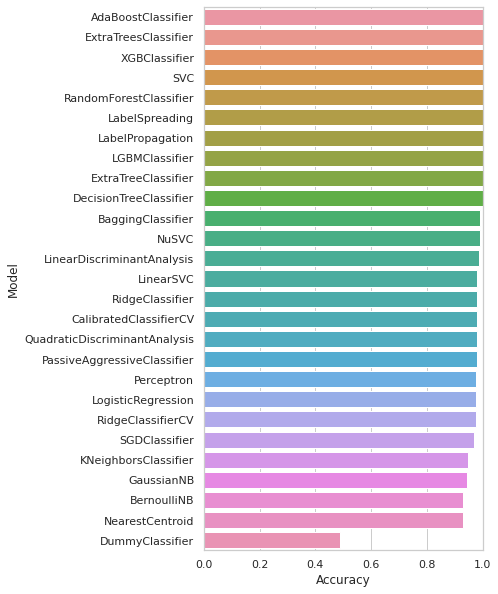

In [ ]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

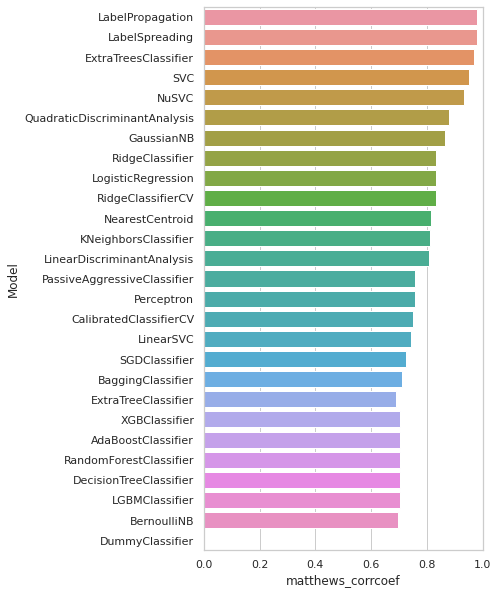

In [ ]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="matthews_corrcoef", data=models_test)
ax.set(xlim=(0, 1))

---